In [4]:
#All packages we will preload for the code below.

from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.Seq import translate
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import numpy as np

#%%%%%%%%%%%%%%%#
### FUNCTIONS ###
#%%%%%%%%%%%%%%%#

In [5]:
## Function 1 ## Document the code provided to create a dictionary from the fasta file

def get_sequences_from_file(fasta_fn): 
    #This is the start of the funciton, instead of calling all of this code later, we can simply call this line to run the code and insert the data in the ()
    sequence_data_dict = {} 
    #This initializes a directory within the function to store information, this is a local dictionary and is not global, meaning it will get deleted unless stored globally
    for record in SeqIO.parse(fasta_fn, "fasta"): 
    #This begins the for loop through the function, for each record within the "fasta" data file, do the following steps after this line
        description = record.description.split() 
        #This takes the total description of the specimen from the fasta file and splits it into sections
        species_name = description[1] + " " + description[2] 
        #This returns the 2nd object a space and the 3rd object as the dictionary key for each specimen
        sequence_data_dict[species_name] = record.seq 
        #This populates the value for the key assigned above as the sequence record from the fasta file
    return(sequence_data_dict) 
    #This returns the dictionary and finalizes the function

In [6]:
## Function 2 ## Finish the psuedo-code for the translate_function to translate DNA sequence to Amino Acid sequence

#Obtained from Stack Overflow at website https://stackoverflow.com/questions/19521905/translation-dna-to-protein
#Modified to run within the confines of the data we are working on.
#I found this code using google, but it works perfectly for what we are trying to achieve.
#I will define the additional packages and tools utilized to turn the DNA sequence string into an Amino Acid Sequence String.

from itertools import takewhile
#The definition of itertools.takewhile from the python.org website "Make an iterator that returns elements fromt the iterable as long as the preciate is true"

def translate_function(sequence, mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"], stop_codons = ('TAA', 'TAG', 'AGA', 'AGG')):
    #This is the start of the function, sequence will be replaced by the data, within the function we initialize and define the codon table, define what are stop codons 
    start = sequence.find('ATG') 
    #This should find the start of the protein sequence, for our data all of our records start with ATG, but for other examples may be more applicable
    trimmed_sequence = sequence[start:]
    #This will trim the sequence to where we will begin the amino acid sequence string
    codons = [trimmed_sequence[i:i+3] for i in range(0, len(trimmed_sequence), 3)]
    #This will separate out the codons within the DNA sequence to groups of 3
    coding_sequence = takewhile(lambda x: x not in stop_codons and len(x) == 3, codons)
    #Here's where we will utilize itertools.takewhile, as long as the codon is not a stop codon it will be added to the amino acid sequence string
    aa_seq_string = ''.join([mito_table.forward_table[codon] for codon in coding_sequence])
    #This populates the sequence string by calling the appropriate amino acid from the mito_table and adding to the string
    return "{0}_".format(aa_seq_string)
    #This will return the string for the defined specimen put in the function()

In [7]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")
#Taken from the bottom, we will populate a global identity for the cytb_seqs dicitonary we created from the function above
#Also a good test that the function works and doesn't spit an error

In [8]:
cytb_seqs
#A glance at the global dictionary to look at the keys and values
#Again another good test for whether the function performed as we'd wanted it too.

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA', SingleLetterAlphabet()),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA', SingleLetterAlphabet()),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG', SingleLetterAlphabet()),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTA

In [9]:
translate_function(cytb_seqs['Aptenodytes forsteri'])
#Testing the translate function for the first key in the cytb_seqs dictionary
#It works but gives an interesting warning

C:\ProgramData\Anaconda3\lib\site-packages\Bio\Seq.py:152: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)


'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH_'

In [10]:
## Function 3 ## Write an easier function to obtain the Amino Acid sequence of a DNA sequence

#There is a much easier way to translate a DNA sequence to Amino Acids that has already been written within the Biopython package
#Taken from biopython.org tutorial, the translate function does almost exactly what the previous function we just created does
#The minor difference is that in the translate function within biopython, the stop codons are still in the amino acid sequence but are designated with *
#We will address that within our next function

translate(cytb_seqs['Aptenodytes forsteri'])
#For this example, I have again done the first key in the cytb_seqs dictinonary, which returns a list

Seq('MAPNLRKSHPLLKIINNSLIDLPTPSNISA**NFGSLLGICLTTQILTGLLLAI...NH*', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [11]:
## Function 4 ## Calculate Molecular Weight of the Amino Acid Sequence

#Pull the ProtParam module and import Protein Analysis for the next portion
#http://biopython.org/wiki/ProtParam

def molecular_weight(aa_seq):
    
    str_seq = ''.join(aa_seq)
    #Converting the list to a string
    str_seq = str_seq.replace("*","")
    #Eliminating the stop codon positions
    analysed_seq = ProteinAnalysis(str_seq)
    #Uses the package to analyze the amino acid string
    print(analysed_seq.molecular_weight())
    #Print the calculated molecular weight of the string
    

In [12]:
Apt_for = translate(cytb_seqs['Aptenodytes forsteri'])
#Develop the list that we wish to test, again using the first key value of the dictionary we created

molecular_weight(Apt_for)
#Test the function, which seems to work, supplying the molecular weight of the aa_seq 

40471.2343


In [13]:
## Function 5 ## Calculate the GC-content of a DNA sequence

def GC_prop(sequence):
    
    g = sequence.count("G")
    #Count the number of G in the sequence
    c = sequence.count("C")
    #Count the number of C in the sequence
    l = len(sequence)
    #Count the total length of the sequence
    gc_prop = (g + c) / l
    #Add counts of G and C and divide by total count to obtain proportion of GC Content
    print(gc_prop)
    #Print the proportion

In [15]:
GC_prop(cytb_seqs['Aptenodytes forsteri'])

0.48381452318460194


#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

In [30]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [31]:
penguins_df

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


In [32]:
## 6 ## Add columns for "molecular weight" and "GC content" to the penguins_df

#We have already imported numpy as np above
#We will add each one separately using numpy and assigning the value for each as NaN to be filled in later

penguins_df["molecular weight"] = np.nan
penguins_df["GC content"] = np.nan

In [33]:
penguins_df

,species,mass,molecular weight,GC content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


In [51]:
## 7 ## Work through a for loop to obtain molecular weights and gc content to populate data frame

for key, value in cytb_seqs.items():   
    
    aa_seq = translate(value) 
    
    #mol_weight = molecular_weight(aa_seq)
    #Here we will use function #4 from above
           
    GC_content = GC_prop(value)
    #Here we will use function #5 from above
        
    #penguins_df.set_index("species", inplace=True)
    #penguins_df[row ,'molecular weight'] = mol_weight
    #penguins_df[row ,'GC Content'] = GC_content
 

0.48381452318460194
0.4969378827646544
0.5118110236220472
0.5091863517060368
0.5083114610673666
0.4925634295713036
0.49081364829396323
0.4776902887139108
0.4715660542432196
0.48293963254593175
0.4925634295713036
0.4820647419072616


In [52]:
mol_weights = [40471.2343,40743.510399999985,40709.49419999999,40865.67809999998,40709.49419999999,40335.1015,40674.49449999999,40193.8878,40403.25979999999,40238.9329,40206.93589999999,40266.986]
GC_content = [0.48381452318460194,0.4969378827646544,0.5118110236220472,0.5091863517060368,0.5083114610673666,0.4925634295713036,0.49081364829396323,0.4776902887139108,0.4715660542432196,0.48293963254593175,0.4925634295713036,0.4820647419072616]

In [53]:
penguins_df['molecular weight'] = mol_weights
penguins_df['GC content'] = GC_content

In [54]:
penguins_df

,species,mass,molecular weight,GC content
0,Aptenodytes forsteri,28.00,40471.2343,0.483815
1,Aptenodytes patagonicus,13.40,40743.5104,0.496938
2,Eudyptes chrysocome,2.80,40709.4942,0.511811
3,Eudyptes chrysolophus,4.50,40865.6781,0.509186
4,Eudyptes sclateri,4.25,40709.4942,0.508311
5,Eudyptula minor,1.60,40335.1015,0.492563
6,Pygoscelis adeliae,4.60,40674.4945,0.490814
7,Pygoscelis antarctica,4.10,40193.8878,0.477690
8,Pygoscelis papua,6.10,40403.2598,0.471566
9,Spheniscus demersus,3.20,40238.9329,0.482940


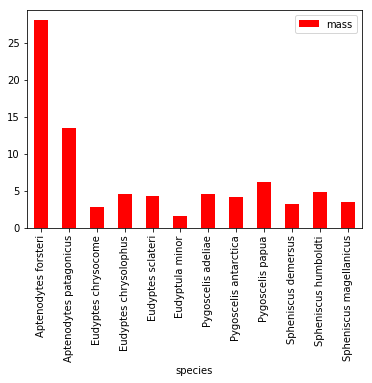

In [68]:
## 8 ##

penguins_df.plot('species', 'mass', kind='bar', color='r')
#Q1 We can see that Eudyptula minor is the smallest of the penguins
#Q2 They are also referred to as "Fairy Penguins" in their native Australia (Wikipedia.com)

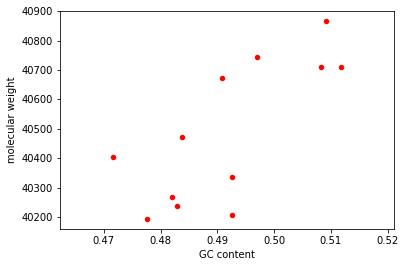

In [69]:
## 9 ##
penguins_df.plot('GC content', 'molecular weight', kind = 'scatter', color = 'r')

In [71]:
## 10 ##

penguins_df.to_csv('penguins_mass_cytb.csv', sep='\t')